In [112]:
from scapy.all import *
import matplotlib.pyplot as plt
import numpy as np

In [157]:
# dictionary for packet type
type_dic={6:'TCP'
          ,17:'UDP'}

flag_dic={0:'NuLL'
          ,1:'FIN'
          ,2:'SYN'
          ,12:'SYN,ACK'
          ,16:'ACK'}

def receive_packet(packet):
    # 紀錄IP來源
    IP_src.append(packet[IP].src)
    # 紀錄封包種類
    IP_type.append(packet[IP].proto)
    
    # TCP packet
    if packet[IP].proto == 6:
        # 紀錄flag值
        flag.append(packet[TCP].flags.value)
        print('Src:',packet[IP].src,type_dic[packet[IP].proto],'flag:',packet[TCP].flags.value)
        
        # 根據 payload 計算 reward (payload長度=1 -> reward+1, payload長度=2 -> reward-1)
        global rewards
        reward = None
        # 若封包 payload 有值
        if hasattr(packet, 'load'):       
            if len(packet[TCP].load) == 1:
                reward = 1
            elif len(packet[TCP].load) == 2:
                reward = -1 
            else:
                reward = 0
        else:
            reward = 0
        rewards += reward

    # UDP packet
    elif packet[IP].proto == 17:
        # UDP -> 將flag設為 0
        flag.append(0)
        print('Src:',packet[IP].src,type_dic[packet[IP].proto])
        
    
    
def Sniff(Filter="tcp and port 80", Count=5, Timeout=5, action=None):
    packet = sniff(filter=Filter, prn=lambda x:receive_packet(x), count=Count, timeout=Timeout)
    new_observation = None
    return rewards, new_observation

def choose_action(observation):
    action = None
    return action

Src: 188.12.205.108 TCP flag: 2
Src: 42.202.182.254 TCP flag: 2
Src: 177.249.50.48 TCP flag: 2
Src: 112.201.154.1 TCP flag: 2
Src: 194.120.214.223 TCP flag: 2
Src: 117.28.23.190 TCP flag: 2
Src: 187.72.199.33 TCP flag: 2
Src: 36.18.223.26 TCP flag: 2
Src: 69.198.79.211 TCP flag: 2
Src: 194.115.250.19 TCP flag: 2
Src: 43.121.187.31 TCP flag: 2
Src: 181.51.23.154 TCP flag: 2
Src: 139.216.110.114 TCP flag: 2
Src: 114.194.120.37 TCP flag: 2
Src: 210.33.82.230 TCP flag: 2
Src: 149.144.227.92 TCP flag: 2
Src: 223.54.219.113 TCP flag: 2
Src: 244.241.174.186 TCP flag: 2
Src: 78.17.120.225 TCP flag: 2
Src: 37.163.172.114 TCP flag: 2
Src: 163.154.117.231 TCP flag: 2
Src: 238.160.173.152 TCP flag: 2
Src: 96.34.68.140 TCP flag: 2
Src: 224.59.127.56 TCP flag: 2
Src: 228.131.239.85 TCP flag: 2
Src: 141.207.192.186 TCP flag: 2
Src: 47.99.109.71 TCP flag: 2
Src: 60.3.200.104 TCP flag: 2
Src: 29.61.20.49 TCP flag: 2
Src: 2.13.143.236 TCP flag: 2
Src: 167.139.77.71 TCP flag: 2
Src: 11.147.83.166 TCP fla

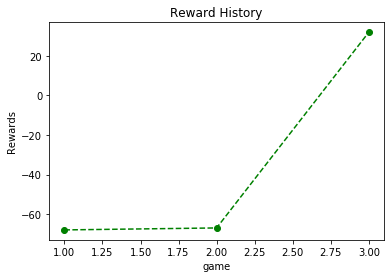

In [161]:
episode = 3    # 遊戲次數
Rewards = []   # 紀錄reward歷史資料 
observation=[] # 初始環境狀態
count = 0      # 一局遊戲接受封包數量(0代表無限)
timeout = 10   # 一局遊戲時間長度

for i in range(episode):
    IP_type=[] # 封包種類
    IP_src=[]  # IP來源
    flag=[]    # flag種類
    rewards=0  # 根據payload決定分數
    
    # 根據前一狀態選擇 action
    new_action = choose_action(observation)
    # 回傳新動作獲得之遊戲 reward、狀態
    episode_rewards, new_observation = Sniff(Count=count, Timeout=timeout, action=new_action)
    # 紀錄遊戲獲得之 reward
    Rewards.append(episode_rewards)
    # 將狀態更新
    observation = new_observation

# plot the rewards history
plt.plot(np.arange(len(Rewards))+1, Rewards, 'go--')
plt.title('Reward History')
plt.xlabel('game')
plt.ylabel('Rewards')
plt.show()